<!--NAVIGATION-->
< [多个子图表](04.08-Multiple-Subplots.ipynb) | [目录](Index.ipynb) | [自定义刻度](04.10-Customizing-Ticks.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.09-Text-and-Annotation.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Text and Annotation

# 文本和标注

> Creating a good visualization involves guiding the reader so that the figure tells a story.
In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.
Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.
Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and  importing the functions we will use:

创建一个优秀的可视化图表的关键在于引导读者，让他们能理解图表所讲述的故事。在一些情况下，这个故事可以通过纯图像的方式表达，不需要额外添加文字，但是在另外一些情况中，图表需要文字的提示和标签才能将故事讲好。也许标注最基本的类型就是图表的标签和标题，但是其中的选项参数却有很多。让我们在本节中使用一些数据来创建可视化图表并标注这些图表来表达这些有趣的信息。首先还是需要将要用到的模块和包导入notebook：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Example: Effect of Holidays on US Births

## 例子：节假日对美国出生率的影响

> Let's return to some data we worked with earler, in ["Example: Birthrate Data"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data), where we generated a plot of average births over the course of the calendar year; as already mentioned, that this data can be downloaded at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

本例中的数据是前面章节我们已经用过的（参见["例子：出生率"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data)），当时我们对年内的平均出生数据创建了一个图表；就像前面已经提到的，这个数据可以在 https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 下载。

> We'll start with the same cleaning procedure we used there, and plot the results:

我们先按照前面的方式进行同样的数据清洗程序，然后以图表展示这个结果：

In [2]:
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

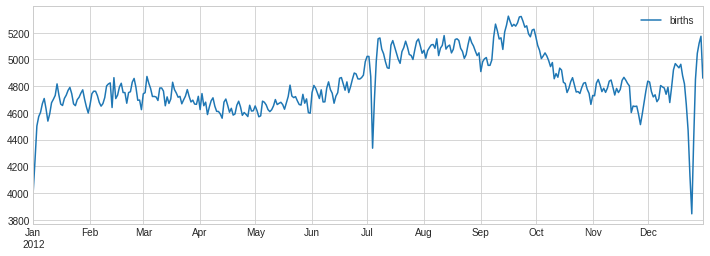

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

> When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention.
This can be done manually with the ``plt.text``/``ax.text`` command, which will place text at a particular x/y value:

当我们绘制了这样的图表来表达数据时，如果我们能对一些图表的特性作出标注来吸引读者的注意力通常是非常有帮助的。这可以通过调用`plt.text`或`ax.text`函数来实现，它们可以在某个特定的x，y轴位置输出一段文字：

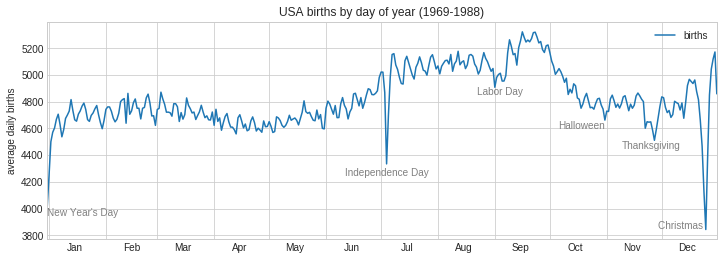

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在折线的特殊位置标注文字
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 设置标题和y轴标签
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置x轴标签月份居中
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

> The ``ax.text`` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used ``ha='right'`` and ``ha='center'``, where ``ha`` is short for *horizonal alignment*.
See the docstring of ``plt.text()`` and of ``mpl.text.Text()`` for more information on available options.

`ax.text`方法接收x位置、y位置、一个字符串和额外可选的关键字参数可以用来设置颜色、大小、样式、对齐等文本格式。上面我们使用了`ha='right'`和`ha='center'`，这里的`ha`是*hirizonal alignment（水平对齐）*的缩写。要查阅更多的可用参数，请查看`plt.text()`和`mpl.text.Text()`的文档字符串内容。

## Transforms and Text Position

## 转换和文本位置

> In the previous example, we have anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the *transform*.

在刚才的例子中，我们将文字标注根据数据位置进行了定位。有些时候我们需要将文字标注独立于数据位置而根据图表位置进行定位。Matplotlib通过*转换*完成这项工作。

> Any graphics display framework needs some scheme for translating between coordinate systems.
For example, a data point at $(x, y) = (1, 1)$ needs to somehow be represented at a certain location on the figure, which in turn needs to be represented in pixels on the screen.
Mathematically, such coordinate transformations are relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform them (these tools can be explored in the ``matplotlib.transforms`` submodule).

任何的图形显示框架都需要在坐标系统之间进行转换的机制。例如，一个数据点位于$(x, y) = (1, 1)$被转换为图表中的某个位置，进而转换为屏幕上显示的像素。这样的坐标转换在数学上都相对来说比较直接，，而且Matplotlib提供了一系列的工具实现了转换（这些工具可以在`matplotlib.transforms`模块中找到）。

> The average user rarely needs to worry about the details of these transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three pre-defined transforms that can be useful in this situation:

> - ``ax.transData``: Transform associated with data coordinates
> - ``ax.transAxes``: Transform associated with the axes (in units of axes dimensions)
> - ``fig.transFigure``: Transform associated with the figure (in units of figure dimensions)

一般来说，用户很少需要关注这些转换的细节，但是当考虑将文本在图表上展示时，这些知识却比较有用。在这种情况中，下面三种定义好的转换是比较有用的：

- `ax.transData`：与数据坐标相关的转换
- `ax.tranAxes`：与Axes尺寸相关的转换（单位是axes的宽和高）
- `ax.tranFigure`：与figure尺寸相关的转换（单位是figure的宽和高）

> Here let's look at an example of drawing text at various locations using these transforms:

下面我们来看看使用这些转换将文字写在图表中不同位置的例子：

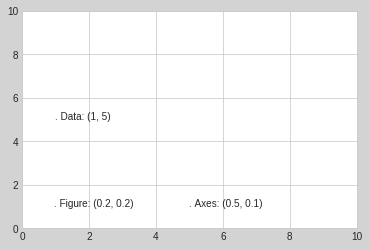

In [5]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData是默认的，这里写出来是为了明确对比
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

> Note that by default, the text is aligned above and to the left of the specified coordinates: here the "." at the beginning of each string will approximately mark the given coordinate location.

注意默认情况下，文字是在指定坐标位置靠左对齐的：这里每个字符串开始的"."的位置就是每种转换的坐标位置。

> The ``transData`` coordinates give the usual data coordinates associated with the x- and y-axis labels.
The ``transAxes`` coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size.
The ``transFigure`` coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size.

`transData`坐标给定的是通常使用的x和y轴坐标位置。`transAxes`坐标给定的是从axes左下角开始算起（白色区域）的坐标位置，使用的是宽度和长度的占比。`transFigure`坐标类似，给定的是从figure左下角开始算起（灰色区域）的坐标位置，使用的也是宽度和长度的占比。

> Notice now that if we change the axes limits, it is only the ``transData`` coordinates that will be affected, while the others remain stationary:

因此如果我们改变了轴的最大长度，只有`transData`坐标会收到影响，其他两个还是保持在相同位置：

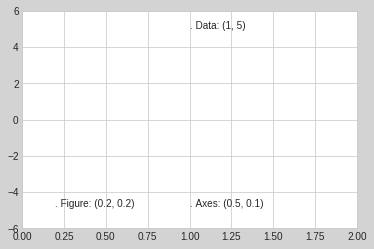

In [6]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

> This behavior can be seen more clearly by changing the axes limits interactively: if you are executing this code in a notebook, you can make that happen by changing ``%matplotlib inline`` to ``%matplotlib notebook`` and using each plot's menu to interact with the plot.

这个变化可以通过动态改变轴的最大长度看的更加清楚：如果你在notebook执行这段代码，你可以将`%matplotlib inline`改为`%matplotlib notebook`，然后使用图表的菜单来交互式的改变图表。

## Arrows and Annotation

## 箭头和标注

> Along with tick marks and text, another useful annotation mark is the simple arrow.

除了刻度标签和文字标签，另一种常用的标注是箭头。

> Drawing arrows in Matplotlib is often much harder than you'd bargain for.
While there is a ``plt.arrow()`` function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, and the result is rarely what the user intended.
Instead, I'd suggest using the ``plt.annotate()`` function.
This function creates some text and an arrow, and the arrows can be very flexibly specified.

在Matplotlib中绘制箭头通常比你想象的难得多。虽然有`plt.arrow()`函数，作者不建议使用它：这个函数绘制的箭头是一个SVG对象，因此在图表使用不同的比例的情况会产生问题，结果通常不能让用户满意。因此，作者建议使用`plt.annotate()`函数。这个函数会绘制一些文字以及一个箭头，并且箭头可以非常灵活的进行配置。

> Here we'll use ``annotate`` with several of its options:

下面我们提供一些参数来使用`annotate`函数：

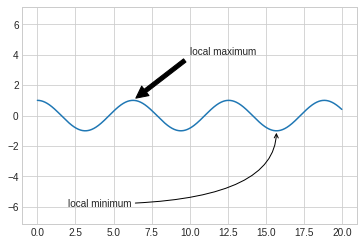

In [7]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

> The arrow style is controlled through the ``arrowprops`` dictionary, which has numerous options available.
These options are fairly well-documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to quickly show some of the possibilities.
Let's demonstrate several of the possible options using the birthrate plot from before:

箭头的样式是使用`箭头属性`字典值进行控制的，里面有很多可用的参数。这些参数在Matplotlib的在线文档中已经有了很详细的说明，因此在这里就不将这部分内容重复介绍一遍了。我们在前面出生率图上再使用一些参数进行更多的说明：

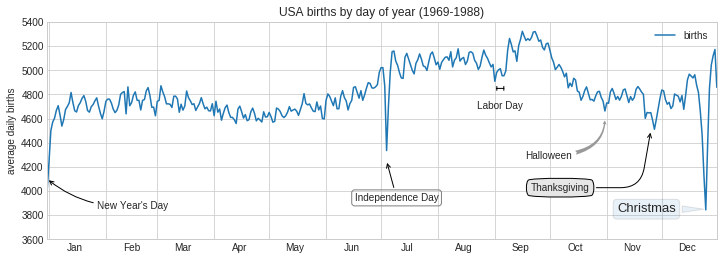

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 为图表添加标注
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 设置图表标题和坐标轴标记
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置月份坐标居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

> You'll notice that the specifications of the arrows and text boxes are very detailed: this gives you the power to create nearly any arrow style you wish.
Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time consuming when producing publication-quality graphics!
Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather included as a demonstration of some of the available options.

上图中箭头和文字框都非常详尽了：可以看出你几乎可以使用`plt.annotate`创建任何你想要的箭头样式。不幸的是，这意味着这种特性都需要手工进行调整，因此如果需要获得印刷质量的图像，这将是一个非常耗费时间的工作。最后，必须指出，上述这种多种样式混合的方式来展现数据肯定不是最佳实践，这里只是为了尽可能多的介绍可用的参数。

> More discussion and examples of available arrow and annotation styles can be found in the Matplotlib gallery, in particular the [Annotation Demo](http://matplotlib.org/examples/pylab_examples/annotation_demo2.html).

更多关于Matplotlib的箭头和标注样式的讨论和例子可以访问Matplotlib gallery，特别是[标注演示](http://matplotlib.org/examples/pylab_examples/annotation_demo2.html)。

<!--NAVIGATION-->
< [多个子图表](04.08-Multiple-Subplots.ipynb) | [目录](Index.ipynb) | [自定义刻度](04.10-Customizing-Ticks.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.09-Text-and-Annotation.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
